# 高斯核函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-4, 5, 1)

In [3]:
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [4]:
y = np.array((x>= -2) & (x<=2), dtype='int')

In [5]:
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

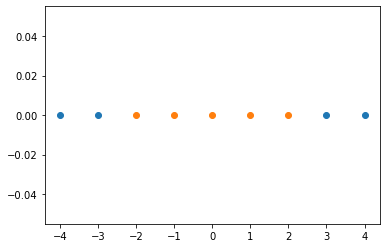

In [6]:
plt.scatter(x[y==0], [0]*len(x[y==0]))
plt.scatter(x[y==1], [0]*len(x[y==1]))
plt.show()

In [7]:
def gaussian(x, l):
    gamma = 1.0
    return np.exp(-gamma * (x - l) ** 2)

In [9]:
l1, l2 = -1, 1

X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i, 0] = gaussian(data, l1)
    X_new[i, 1] = gaussian(data, l2)
    

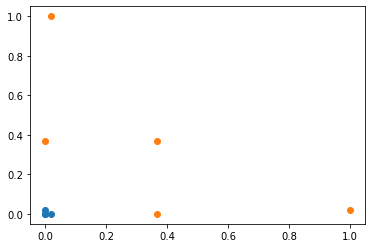

In [10]:
plt.scatter(X_new[y==0, 0], X_new[y==0, 1])
plt.scatter(X_new[y==1, 0], X_new[y==1, 1])
plt.show()

## sklearn中RBF

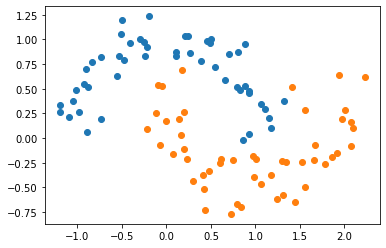

In [11]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('svc', SVC(kernel='rbf', gamma=gamma))
    ])

In [13]:
svc = RBFKernelSVC(gamma=1.0)

svc.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=1.0))])

In [14]:
def plot_descision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap)

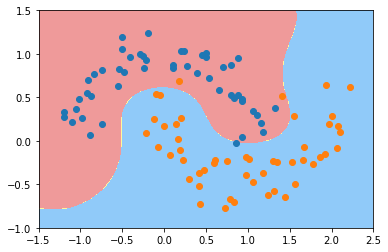

In [16]:
plot_descision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [17]:
svc_gamma100 = RBFKernelSVC(gamma=100)

svc_gamma100.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=100))])

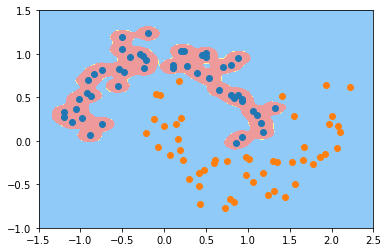

In [18]:
plot_descision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [19]:
svc_gamma10 = RBFKernelSVC(gamma=10)

svc_gamma10.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=10))])

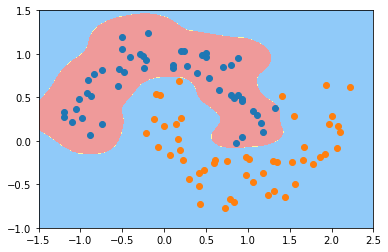

In [20]:
plot_descision_boundary(svc_gamma10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [21]:
svc_gamma01 = RBFKernelSVC(gamma=0.1)

svc_gamma01.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=0.1))])

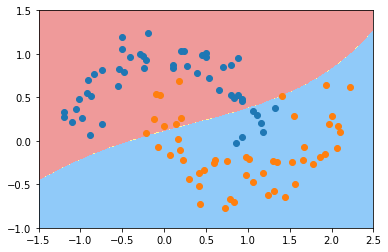

In [22]:
plot_descision_boundary(svc_gamma01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()